In [ ]:
!pip install convokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for convokit: filename=convokit-2.5.3-py3-none-any.whl size=204125 sha256=10d1a32f728bbc8b505cc4cb02810b2e1def7c76bb46214d9e027dd0c42d640a
  Stored in directory: /root/.cache/pip/wheels/8f/da/dd/d65869bf6766b536f422e0a9753e9cf98bb9df7904b5b9c4a5
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=06b40b472d452eb3046f9571b7344af988312319339604774d6be453ec876355
  St

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load martin quinn scores
martin_quinn = pd.read_csv('/content/drive/MyDrive/INFO251Final/MartinQuinnScores.csv')

In [ ]:
# create dataframe of cases without transcripts (Cornell convokit)
df_cases = pd.read_csv('/content/drive/MyDrive/INFO251Final/Outcomes_NoTranscript.csv')
#clean unique instance
df_cases['mq_score'] = df_cases['mq_score'].str.replace('0.162.5', '0.162')

#drop cases with -1 as win_side
df_cases = df_cases[df_cases['win_side']!=-1]

<ipython-input-4-243a8a7bd43c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cases['mq_score'] = df_cases['mq_score'].str.replace('0.162.5', '0.162')


In [ ]:
df_cases['mq_score'].unique()

array(['0.559', '0.162', '0.58', '0.643', '0.335', '0.443', '-0.041',
       '-1.079', '-1.133', '-0.707', '-0.56', '-0.414', '-1.043',
       '-0.896', '0.19', '0.381', '0.64', '0.945', '0.609', '0.615',
       '0.492', '0.473', '0.233', '0.156', '0.24', '0.231', '0.266',
       '0.673', '0.877', '0.828', '0.932', '0.878', '0.972', '1.098',
       '0.876', '0.919', '0.756', '0.838', '0.817', '0.736', '0.685',
       '0.782', '0.798', '0.861', '0.849', '0.589', '0.371', '0.26',
       '0.222', '0.11', '0.2705', '0.458', '0.411', '0.576', '0.516',
       '0.577', '0.296', '0.068', '-0.227', '-0.269', '-0.059', '0.298',
       '0.402', '0.355'], dtype=object)

In [ ]:
# create dataframe from Washington University data
df_wash = pd.read_csv('/content/drive/MyDrive/INFO251Final/WashU_onerowpercaseid.csv', encoding='Windows-1252')

In [ ]:
df_wash.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
2,1946-003,1946-003-01,1946-003-01-01,1946-003-01-01-01,11/18/1946,1,329 U.S. 29,67 S. Ct. 1,91 L. Ed. 22,1946 U.S. LEXIS 3037,...,1.0,NaN,2.0,207.0,NaN,84.0,78.0,1,5,4
3,1946-004,1946-004-01,1946-004-01-01,1946-004-01-01-01,11/25/1946,7,329 U.S. 40,67 S. Ct. 167,91 L. Ed. 29,1946 U.S. LEXIS 1696,...,4.0,NaN,6.0,600.0,49 Stat. 801,87.0,87.0,1,5,3
4,1946-005,1946-005-01,1946-005-01-01,1946-005-01-01-01,11/25/1946,1,329 U.S. 64,67 S. Ct. 154,91 L. Ed. 44,1946 U.S. LEXIS 2997,...,7.0,NaN,NaN,NaN,NaN,78.0,87.0,1,6,3


In [ ]:
#Transform some data to words instead of numerical values?

# Column: Issue Area
# issue area is listed as numerical value but they correspond to different categories
# create dictionary of column integers and corresponding meanings
data_issueArea = ({'Integer Value':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                'Issue Area':['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process',
                                      'Privacy', 'Attorneys', 'Unions', 'Economic Activity', 'Judicial Power',
                                      'Federalism', 'Interstate Relations', 'Federal Taxation', 'Miscellaneous',
                                      'Private Action']})
# turn into dataframe
df_issueArea = pd.DataFrame(data_issueArea)
# replace the values in Wash U with the words
df_issueArea.set_index('Integer Value', inplace=True)
df_wash['issueArea'] = df_wash['issueArea'].map(df_issueArea['Issue Area'])
df_issueArea.reset_index(inplace=True)
print(df_wash['issueArea'])

# Column: lcDispositionDirection
# lower court disposition direction is listed as numerical value but they correspond to different categories
# create dictionary of column integers and corresponding meanings
data_lcdd = ({'Integer Value':[1,2,3],
                'direction':['conservative', 'liberal', 'unspecifiable']})

# turn into dataframe
df_lcdd = pd.DataFrame(data_lcdd)
# replace the values in Wash U with the words
df_lcdd.set_index('Integer Value', inplace=True)
df_wash['lcDispositionDirection'] = df_wash['lcDispositionDirection'].map(df_lcdd['direction'])
df_lcdd.reset_index(inplace=True)
print(df_wash['lcDispositionDirection'])

0        Economic Activity
1       Criminal Procedure
2        Economic Activity
3             Civil Rights
4        Economic Activity
               ...        
9155     Economic Activity
9156    Criminal Procedure
9157    Criminal Procedure
9158        Judicial Power
9159          Civil Rights
Name: issueArea, Length: 9160, dtype: object
0       conservative
1       conservative
2            liberal
3            liberal
4            liberal
            ...     
9155    conservative
9156         liberal
9157         liberal
9158    conservative
9159    conservative
Name: lcDispositionDirection, Length: 9160, dtype: object


In [ ]:
df_wash.columns 

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes'],
      dtype='object')

In [ ]:
#get only important columns
df_wash_important = df_wash[['caseId', 'issueArea', 'lcDispositionDirection']]

#change case column so it matches df_case
df_wash_important = df_wash_important.rename(columns={'caseId':'case_id'})
df_wash_important['case_id'] = df_wash_important['case_id'].str.replace('-', '_')

df_wash_important.shape

(9160, 3)

In [ ]:
from convokit import Utterance, Corpus, Coordination, download

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# split speakers by case id
# this treats the same person across two different cases as two different speakers
split = ["case_id"]

ModuleNotFoundError: ignored

In [ ]:
# create dataframe of utterances by case
df_utt = pd.read_csv('/content/drive/MyDrive/INFO251Final/Utterances_DataFrame.csv')

<ipython-input-12-1df88e88c522>:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_utt = pd.read_csv('/content/drive/MyDrive/INFO251Final/Utterances_DataFrame.csv')


In [ ]:
df_utt.head()

,Unnamed: 0,timestamp,text,speaker,reply_to,convo_id,case_id,meta.start_times,meta.stop_times,meta.speaker_type,meta.side,meta.timestamp,vectors,utt_id,term,docket_id,mq_score
0,0,NaN,"Number 71, Lonnie Affronti versus United State...",j__earl_warren,NaN,13127,1955_71,"[0.0, 7.624]","[7.624, 9.218]",J,NaN,0.000,[],13127__0_000,1955,71,0.559
1,1,NaN,May it please the Court.\nWe are here by writ ...,harry_f_murphy,13127__0_000,13127,1955_71,"[9.218, 11.538, 15.653, 22.722, 28.849, 33.575]","[11.538, 15.653, 22.722, 28.849, 33.575, 48.138]",A,1.0,9.218,[],13127__0_001,1955,71,0.559
2,2,NaN,Consecutive sentences.,j__william_o_douglas,13127__0_001,13127,1955_71,[48.138],[49.315],J,NaN,48.138,[],13127__0_002,1955,71,0.559
3,3,NaN,"Consecutive sentences.\nIn this case, the defe...",harry_f_murphy,13127__0_002,13127,1955_71,"[49.315, 51.844, 60.81, 67.083, 72.584, 89.839...","[51.844, 60.81, 67.083, 72.584, 89.839, 95.873...",A,1.0,49.315,[],13127__0_003,1955,71,0.559
4,4,NaN,Was the aggregate prison sentence was 20 or 25...,<INAUDIBLE>,13127__0_003,13127,1955_71,[174.058],[176.766],NaN,NaN,174.058,[],13127__0_004,1955,71,0.559


In [ ]:
# updating columns

# rename columns
df_utt = df_utt.rename(columns={'meta.votes_side': 'votes_side',
                                  'meta.win_side': 'win_side',
                                  'meta.case_id': 'case_id',
                                  'med': 'mq_score', 
                                   'conversation_id': 'convo_id',
                                  'term_year': 'term'})

df_utt.term = df_utt.term.astype('int64')
# add MartinQuinn Scores
df_utt = df_utt.merge(martin_quinn[['term', 'med']], on='term')

# drop unused columns
# NOTE we may want to try an analysis on some of these later on
df_utt = df_utt.drop(columns=['speaker', 
                              'reply_to', 
                              'timestamp', 
                              'meta.start_times', 
                              'meta.stop_times', 
                              'meta.speaker_type',
                              'meta.side',
                              'meta.timestamp',
                              'vectors',
                              'Unnamed: 0'])




In [ ]:
df_utt.head()

,text,convo_id,case_id,utt_id,term,docket_id,mq_score,med
0,"Number 71, Lonnie Affronti versus United State...",13127,1955_71,13127__0_000,1955,71,0.559,0.559
1,May it please the Court.\nWe are here by writ ...,13127,1955_71,13127__0_001,1955,71,0.559,0.559
2,Consecutive sentences.,13127,1955_71,13127__0_002,1955,71,0.559,0.559
3,"Consecutive sentences.\nIn this case, the defe...",13127,1955_71,13127__0_003,1955,71,0.559,0.559
4,Was the aggregate prison sentence was 20 or 25...,13127,1955_71,13127__0_004,1955,71,0.559,0.559


In [ ]:
df_convo = pd.read_csv('/content/drive/MyDrive/INFO251Final/Outcomes_NoTranscript.csv')

In [ ]:
# add "win_side" to utterance dataframe

df_utt = df_utt.merge(df_convo[['convo_id', 'win_side']], on='convo_id')


In [ ]:
df_utt = df_utt.rename(columns={'text': 'words'})

In [ ]:
df_utt.head()

,words,convo_id,case_id,utt_id,term,docket_id,mq_score,med,win_side
0,"Number 71, Lonnie Affronti versus United State...",13127,1955_71,13127__0_000,1955,71,0.559,0.559,0.0
1,May it please the Court.\nWe are here by writ ...,13127,1955_71,13127__0_001,1955,71,0.559,0.559,0.0
2,Consecutive sentences.,13127,1955_71,13127__0_002,1955,71,0.559,0.559,0.0
3,"Consecutive sentences.\nIn this case, the defe...",13127,1955_71,13127__0_003,1955,71,0.559,0.559,0.0
4,Was the aggregate prison sentence was 20 or 25...,13127,1955_71,13127__0_004,1955,71,0.559,0.559,0.0


In [ ]:
# Remove instances where case outcome was unknown or ????
df_utt.drop(df_utt[df_utt['win_side'] == -1.0].index, inplace = True)
df_utt.drop(df_utt[df_utt['win_side'] == 2.0].index, inplace = True)

In [ ]:
df_utt['win_side'].value_counts()

1.0    1081359
0.0     615126
Name: win_side, dtype: int64

In [ ]:
df_utt.isnull().sum()

words           0
convo_id        0
case_id         0
utt_id          0
term            0
docket_id       0
mq_score        0
med             0
win_side     3286
dtype: int64

In [ ]:
df_utt = df_utt.dropna()

In [ ]:
df_utt.isnull().sum()

words        0
convo_id     0
case_id      0
utt_id       0
term         0
docket_id    0
mq_score     0
med          0
win_side     0
dtype: int64

Distribution of Words per Utterance

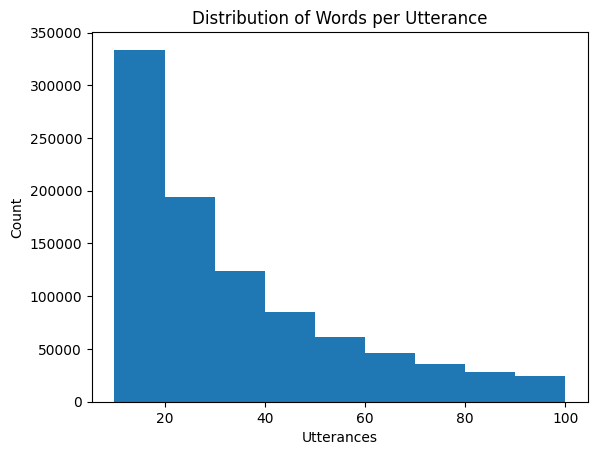

In [ ]:
df_text, df_labels = df_utt['words'], df_utt['win_side']
seq_len = [len(i.split()) for i in df_text]

plt.hist(seq_len, bins=9, range=(10, 100))
plt.title('Distribution of Words per Utterance')
plt.xlabel('Utterances')
plt.ylabel('Count')
plt.show()

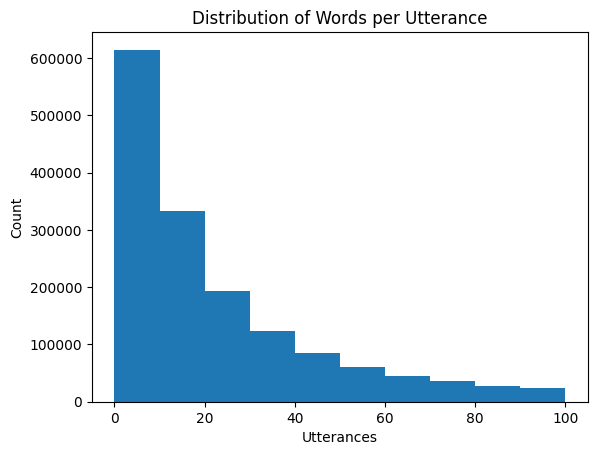

In [ ]:
df_text, df_labels = df_utt['words'], df_utt['win_side']
seq_len = [len(i.split()) for i in df_text]

plt.hist(seq_len, bins=10, range=(0, 100))
plt.title('Distribution of Words per Utterance')
plt.xlabel('Utterances')
plt.ylabel('Count')
plt.show()

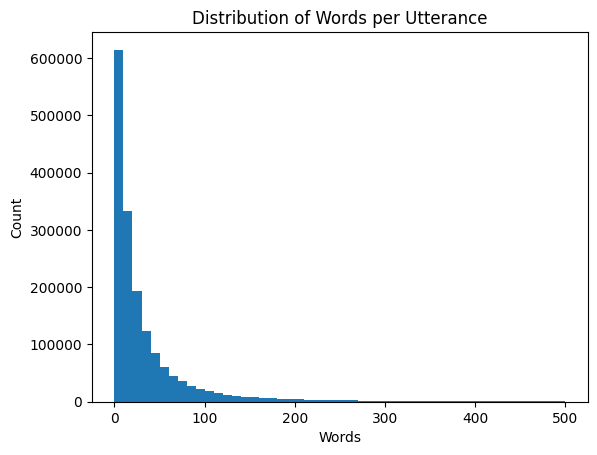

In [ ]:
# add a line at 512
# use outcomes no transcript data 
df_text, df_labels = df_utt['words'], df_utt['win_side']
seq_len = [len(i.split()) for i in df_text]

plt.hist(seq_len, bins=50, range=(0, 500))
plt.title('Distribution of Words per Utterance')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

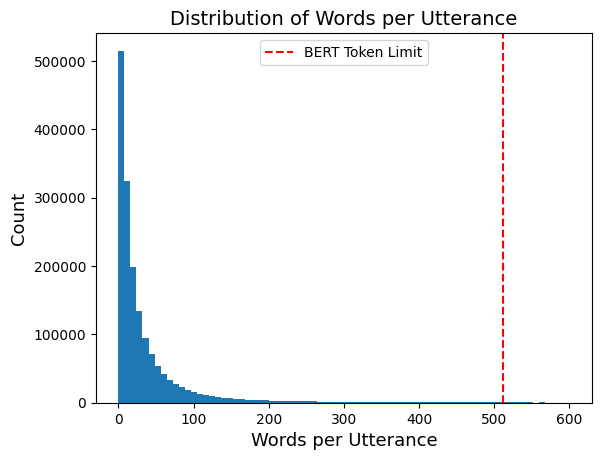

In [ ]:
df_text, df_labels = df_utt['words'], df_utt['win_side']
seq_len = [len(i.split()) for i in df_text]

plt.hist(seq_len, bins=75, range=(0, 600))
plt.axvline(x=512, color='red', linestyle='--', label='BERT Token Limit')  # added line at 512
plt.title('Distribution of Words per Utterance', fontsize=14)
plt.xlabel('Words per Utterance', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(loc='upper center')
plt.show()


Distribution of wins and cases by issue area

In [ ]:
df_wash = pd.read_csv('/content/drive/MyDrive/INFO251Final/WashU_onerowpercaseid.csv', encoding='Windows-1252')
data_issueArea = ({'Integer Value':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                'Issue Area':['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process',
                                      'Privacy', 'Attorneys', 'Unions', 'Economic Activity', 'Judicial Power',
                                      'Federalism', 'Interstate Relations', 'Federal Taxation', 'Miscellaneous',
                                      'Private Action']})

data_lcdd = ({'Integer Value':[1,2,3],
                'direction':['conservative', 'liberal', 'unspecifiable']})

# turn into dataframe
df_issueArea = pd.DataFrame(data_issueArea)
# replace the values in Wash U with the words
df_issueArea.set_index('Integer Value', inplace=True)
df_wash['issueArea'] = df_wash['issueArea'].map(df_issueArea['Issue Area'])
df_issueArea.reset_index(inplace=True)
df_lcdd = pd.DataFrame(data_lcdd)
# replace the values in Wash U with the words
df_lcdd.set_index('Integer Value', inplace=True)
df_wash['lcDispositionDirection'] = df_wash['lcDispositionDirection'].map(df_lcdd['direction'])
df_lcdd.reset_index(inplace=True)

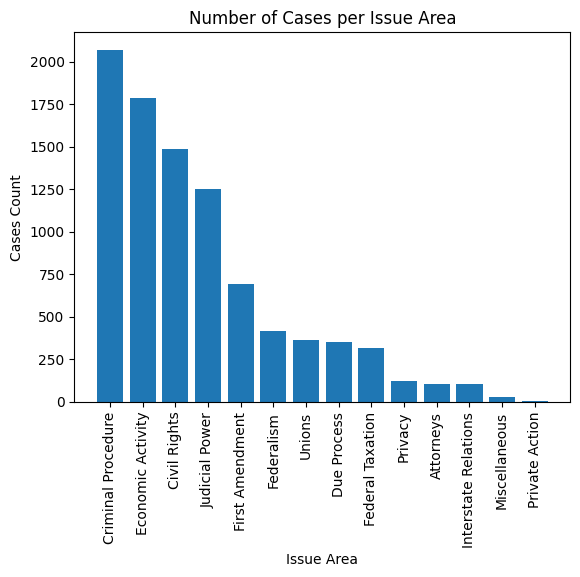

In [ ]:
# general distribution in dataset
# Count the number of cases for each issue area
counts = df_wash['issueArea'].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values)
plt.title('Number of Cases per Issue Area')
plt.xlabel('Issue Area')
plt.ylabel('Cases Count')
plt.xticks(rotation=90)
plt.show()

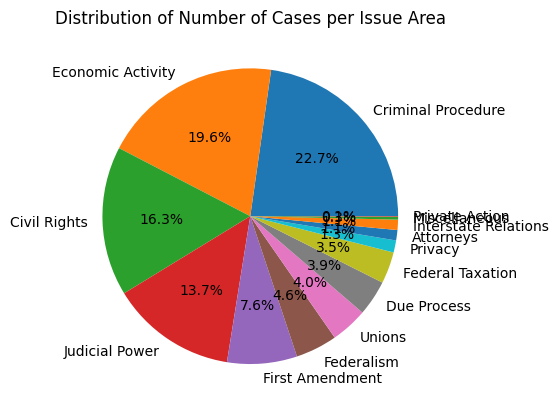

<bound method Series.unique of 0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
9155    1.0
9156    1.0
9157    1.0
9158    0.0
9159    1.0
Name: partyWinning, Length: 9160, dtype: float64>


In [ ]:
# pie chart version 
# Count the number of cases for each issue area
counts = df_wash['issueArea'].value_counts()

# Create the pie chart
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Number of Cases per Issue Area')
plt.show()

print(df_wash['partyWinning'].unique)

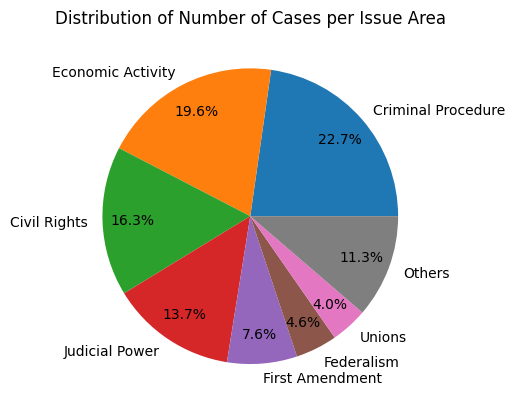

In [ ]:
# Count the number of cases for each issue area
counts = df_wash['issueArea'].value_counts(normalize=True)
labels = counts.index
values = counts.values

# Combine slices with less than 4%
threshold = 0.04
new_labels = []
new_values = []
others_label = 'Others'
others_value = 0

for i in range(len(values)):
    if values[i] >= threshold:
        new_labels.append(labels[i])
        new_values.append(values[i])
    else:
        others_value += values[i]

new_labels.append(others_label)
new_values.append(others_value)

# Plot the pie chart
plt.pie(new_values, labels=new_labels, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Distribution of Number of Cases per Issue Area')
plt.show()


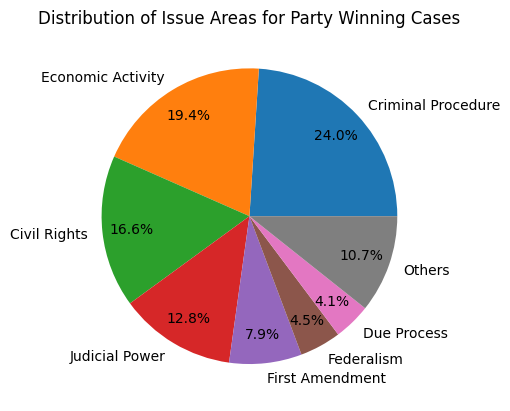

In [ ]:
# now only for party winning 
# Filter dataframe for only part winning
df_part_winning = df_wash[df_wash['partyWinning'] == 1]

# Count the number of cases for each issue area
counts = df_part_winning['issueArea'].value_counts(normalize=True)

# Separate slices with less than 4%
threshold = 0.04
new_labels = []
new_values = []
others_label = 'Others'
others_value = 0

for i in range(len(counts)):
    if counts[i] >= threshold:
        new_labels.append(counts.index[i])
        new_values.append(counts.values[i])
    else:
        others_value += counts.values[i]

new_labels.append(others_label)
new_values.append(others_value)

# Plot the pie chart
plt.pie(new_values, labels=new_labels, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Distribution of Issue Areas for Party Winning Cases')
plt.show()

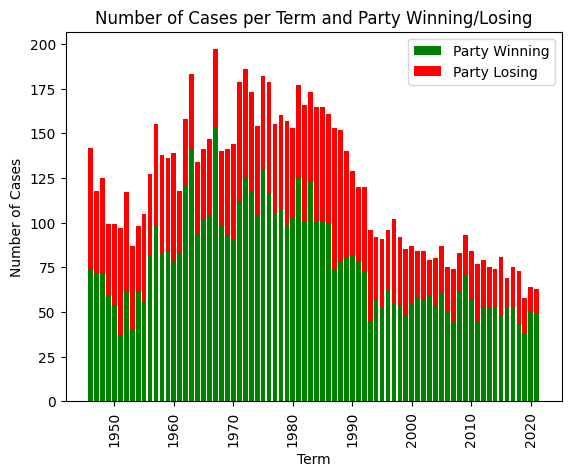

In [ ]:
# Create two dataframes for party winning and losing cases
df_party_win = df_wash[df_wash['partyWinning'] == 1]
df_party_lose = df_wash[df_wash['partyWinning'] == 0]

# Count the number of cases for each term and party winning category
counts_win = df_party_win['term'].value_counts()
counts_lose = df_party_lose['term'].value_counts()

# Combine the two dataframes
df_combined = pd.concat([counts_win, counts_lose], axis=1)
df_combined.columns = ['Party Winning', 'Party Losing']

# Sort the counts by the term values
df_combined = df_combined.sort_index()

# Plot the bar chart
plt.bar(df_combined.index, df_combined['Party Winning'], color='g')
plt.bar(df_combined.index, df_combined['Party Losing'], bottom=df_combined['Party Winning'], color='r')
plt.title('Number of Cases per Term and Party Winning/Losing')
plt.xlabel('Term')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend(['Party Winning', 'Party Losing'])
plt.show()


<ipython-input-35-d714851c37c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts_green.index, rotation=90)


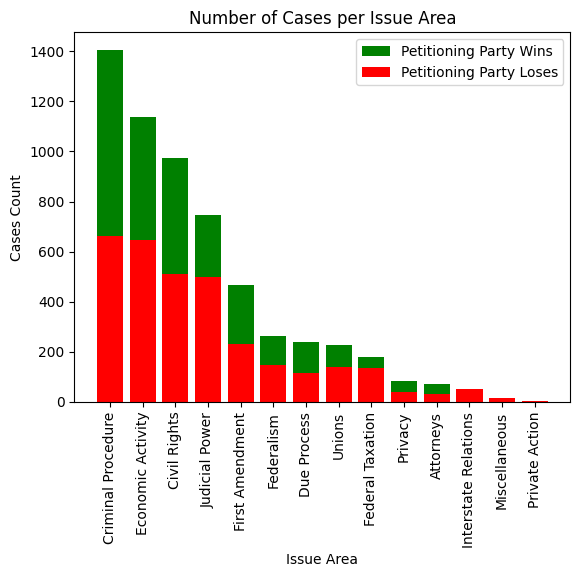

In [ ]:
# Create masks for partyWinning values
mask_green = df_wash['partyWinning'] == 1
mask_red = df_wash['partyWinning'] == 0

# Count the number of cases for each issue area
counts_green = df_wash[mask_green]['issueArea'].value_counts()
counts_red = df_wash[mask_red]['issueArea'].value_counts()

# Set the colors for the bars
color_green = 'green'
color_red = 'red'

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(counts_green.index, counts_green.values, color=color_green, label='Petitioning Party Wins')
ax.bar(counts_red.index, counts_red.values, color=color_red, label='Petitioning Party Loses')
ax.set_title('Number of Cases per Issue Area')
ax.set_xlabel('Issue Area')
ax.set_ylabel('Cases Count')
ax.set_xticklabels(counts_green.index, rotation=90)
ax.legend()
plt.show()



In [ ]:
import ipywidgets as widgets

# Define the function to update the chart
def update_chart(year):
    # Filter the data by year
    mask_year = df_wash['term'] == year
    df_year = df_wash[mask_year]

    # Create masks for partyWinning values
    mask_green = df_year['partyWinning'] == 1
    mask_red = df_year['partyWinning'] == 0

    # Count the number of cases for each issue area
    counts_green = df_year[mask_green]['issueArea'].value_counts()
    counts_red = df_year[mask_red]['issueArea'].value_counts()

    # Set the colors for the bars
    color_green = 'green'
    color_red = 'red'

    # Plot the bar chart
    fig, ax = plt.subplots()
    ax.bar(counts_green.index, counts_green.values, color=color_green, label='Party Winning = 1')
    ax.bar(counts_red.index, counts_red.values, color=color_red, label='Party Winning = 0')
    ax.set_title(f'Number of Cases per Issue Area ({year})')
    ax.set_xlabel('Issue Area')
    ax.set_ylabel('Cases Count')
    ax.set_xticklabels(counts_green.index, rotation=90)
    ax.legend()
    plt.show()

# Get the unique years in the data
years = sorted(df_wash['term'].unique())

# Create a slider widget
year_slider = widgets.IntSlider(min=years[0], max=years[-1], value=years[0], description='Year')

# Create the interactive output
widgets.interact(update_chart, year=year_slider);


interactive(children=(IntSlider(value=1946, description='Year', max=2021, min=1946), Output()), _dom_classes=(…

distribution in case dataset of lower court disposition

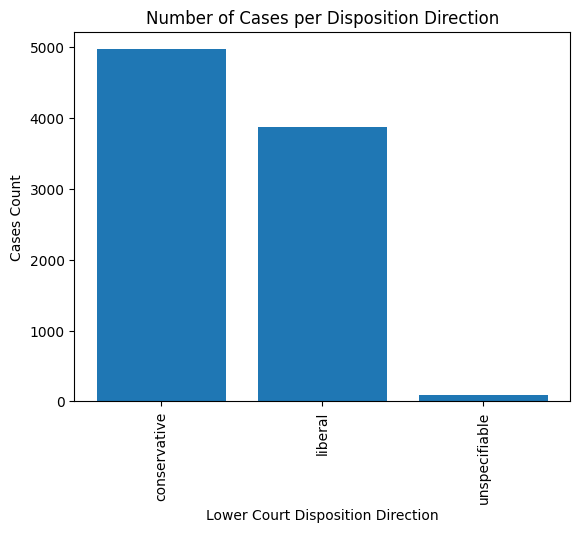

In [ ]:
# Count the number of cases for each issue area
counts = df_wash['lcDispositionDirection'].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values)
plt.title('Number of Cases per Disposition Direction')
plt.xlabel('Lower Court Disposition Direction')
plt.ylabel('Cases Count')
plt.xticks(rotation=90)
plt.show()

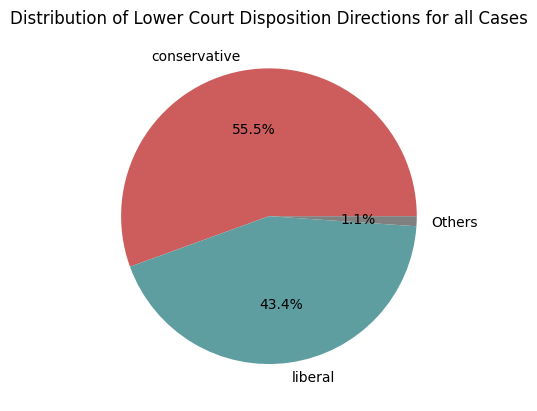

In [ ]:
# Count the number of cases for each issue area
counts = df_wash['lcDispositionDirection'].value_counts()

# Define colors for each category
colors = ['indianred','cadetblue', 'gray']

# Define labels and values for slices with less than 4%
threshold = 0.04
new_labels = []
new_values = []
others_label = 'Others'
others_value = 0

for i in range(len(counts)):
    if counts[i] / sum(counts) >= threshold:
        new_labels.append(counts.index[i])
        new_values.append(counts[i])
    else:
        others_value += counts[i]

new_labels.append(others_label)
new_values.append(others_value)

# Assign colors to each slice
colors += ['gray'] * (len(new_values) - len(colors))

# Plot the pie chart
plt.pie(new_values, labels=new_labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Lower Court Disposition Directions for all Cases')
plt.show()



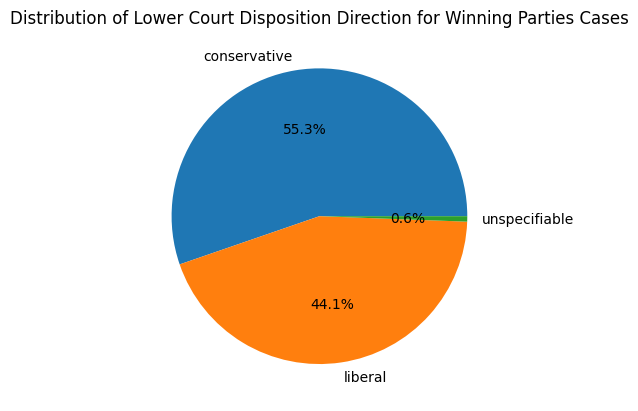

In [ ]:
# Same thing but for part wins
# Count the number of cases for each issue area where partyWinning = 1
counts = df_wash[df_wash['partyWinning'] == 1]['lcDispositionDirection'].value_counts()

# Plot the pie chart
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Lower Court Disposition Direction for Winning Parties Cases')
plt.show()


In [ ]:
# create dataframe of cases without transcripts (Cornell convokit)
df_cases = pd.read_csv('/content/drive/MyDrive/INFO251Final/Outcomes_NoTranscript.csv')
#clean unique instance
df_cases['mq_score'] = df_cases['mq_score'].str.replace('0.162.5', '0.162')

#drop cases with -1 as win_side
df_cases = df_cases[df_cases['win_side']!=-1]
print(df_cases.columns)

Distribution of Wins by Martin-Quinn Score

In [ ]:
# general distribution in dataset
import matplotlib.ticker as ticker

# Select only the rows where win_side is 1
winning_rows = df_cases[df_cases['win_side'] == 1]

# Get the median score for each row in the winning set
median_scores = winning_rows['mq_score']

# Plot the histogram
plt.hist(median_scores)
plt.xlabel('Median Martin-Quinn Score')
plt.ylabel('Count of Wins - Cases')
plt.title('Count of Case Wins by Median Martin-Quinn Score')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [ ]:
data df_wash
caseId
docketId
term

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes'],
      dtype='object')

SyntaxError: ignored

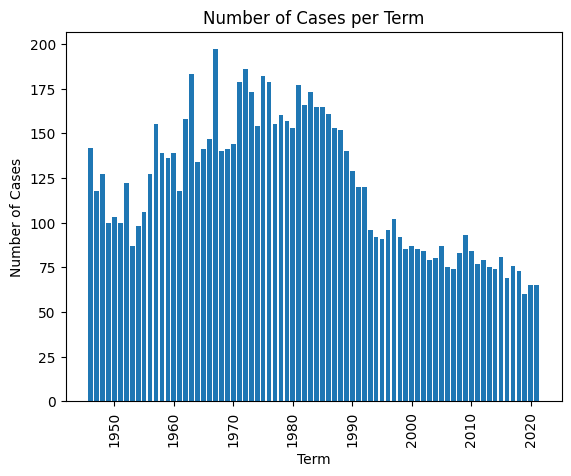

In [ ]:
# Count the number of cases for each term
counts = df_wash.groupby('term')['caseId'].count()

# Plot the bar chart
plt.bar(counts.index, counts.values)
plt.title('Number of Cases per Term')
plt.xlabel('Term')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()



Distribution of transcript word count

In [ ]:
def add_transcripts(df_test, utts=False):
  for index, row in df_test.iterrows():

    folder_path = '/content/drive/MyDrive/INFO251Final/Trancripts_Case_Convo/'
    read_path = folder_path+str(row['convo_id'])+'_'+str(row['case_id'])+'.txt'

    transcript = open(read_path, 'r')
    text = transcript.read()

    # text = get_random_chunk(text) # selects random continuous chunk of text 

    df_test.at[index, 'words'] = text

    transcript.close()

  return df_test

In [47]:
df_convo = add_transcripts(df_convo)

In [48]:
df_text_c, df_labels = df_convo['text'], df_convo['win_side']
seq_len = [len(i.split()) for i in df_text_c]

plt.hist(seq_len, bins=25, range=(0, 1000))
plt.axvline(x=4096, color='red', linestyle='--')  # added line at 4096
plt.title('Distribution of Words per Argument')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

KeyError: ignored

,words,convo_id,case_id,utt_id,term,docket_id,mq_score,med,win_side
0,"Number 71, Lonnie Affronti versus United State...",13127,1955_71,13127__0_000,1955,71,0.559,0.559,0.0
1,May it please the Court.\nWe are here by writ ...,13127,1955_71,13127__0_001,1955,71,0.559,0.559,0.0
2,Consecutive sentences.,13127,1955_71,13127__0_002,1955,71,0.559,0.559,0.0
3,"Consecutive sentences.\nIn this case, the defe...",13127,1955_71,13127__0_003,1955,71,0.559,0.559,0.0
4,Was the aggregate prison sentence was 20 or 25...,13127,1955_71,13127__0_004,1955,71,0.559,0.559,0.0


In [ ]:
args_text = pd.read_csv('/content/drive/MyDrive/INFO251Final/ArgumentsTable.csv')

In [ ]:
df_text, df_labels = args_text['case_transcript'], args_text['meta.win_side']
seq_len = [len(i.split()) for i in df_text]

plt.hist(seq_len, bins=25, range=(0, 15000))
plt.axvline(x=4096, color='red', linestyle='--', label='Large Token Limit')  # added line at 4096
plt.title('Distribution of Words per Argument', fontsize=14)
plt.xlabel('Words per Argument', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
len(args_text['case_transcript'][100].split())

12482